In [1]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from scipy.stats import kendalltau

# Climate change and bird migration

#### Does change in land temperature over the years correlate with a change in migration patterns of long-distance migrating birds in Eastern Europe?

### Abstract


This notebook aims to find correlation, if any, between the global land temperature trends since the year 2000 and the total observations of three species of long-distance migrating birds during this period: little egret *(Egretta garzetta)*, little ringed plover *(Charadrius dubius)* and black stork *(Ciconia nigra)*. I am going to check whether there is a tendency that more individuals of these species that usually spend winter months in Africa do not actually migrate and that the resident population is rising as temperatures rise. Temperature data was derived from kaggle.com and the bird observation data - from the Cornell Lab of Ornithology. The temperature data contains daily average temperature data for Sofia, Bulgaria and for Istanbul, Turkey. The data was averaged for each month. For analysis of correlation between temperature data and bird observation counts, a Kendall rank correlation test was performed.

### Introduction

Climate change has great impact on animal life and reproduction. Bird migration and reproduction is controlled by endogenous factors like temperature, precipitation and availability of food and nesting sites. It has been  demonstrated that there is a highly probable link between global climate change and the migratory phenology of many bird species [1]. The trend toward earlier departure of migrant birds parallels the trend in arrival dates and may reflect pressures to commence migration once breeding is complete. Changes in the timing of arrival and departure may reflect adaptive responses to global climate change. There is a large amount of publications dealing with research on climate change and its effects on animals and biodiversity; however I failed to find any particular paper searching for a possible correlation between the rising global temperatures and the fact that some long-distance migratory species show tendency to stay on their breeding territory range.

The species selected are long-distance migrants and are not usually seen in Europe during the winter months. For better visualisation I've downloaded map data with their distribution ranges.

In [3]:
egret = skimage.io.imread('images/little_egret.jpg')
stork = skimage.io.imread('images/Black-stork-e1574074599695-1024x540.jpeg')
plover = skimage.io.imread('images/Little Ringed Plover.gif')

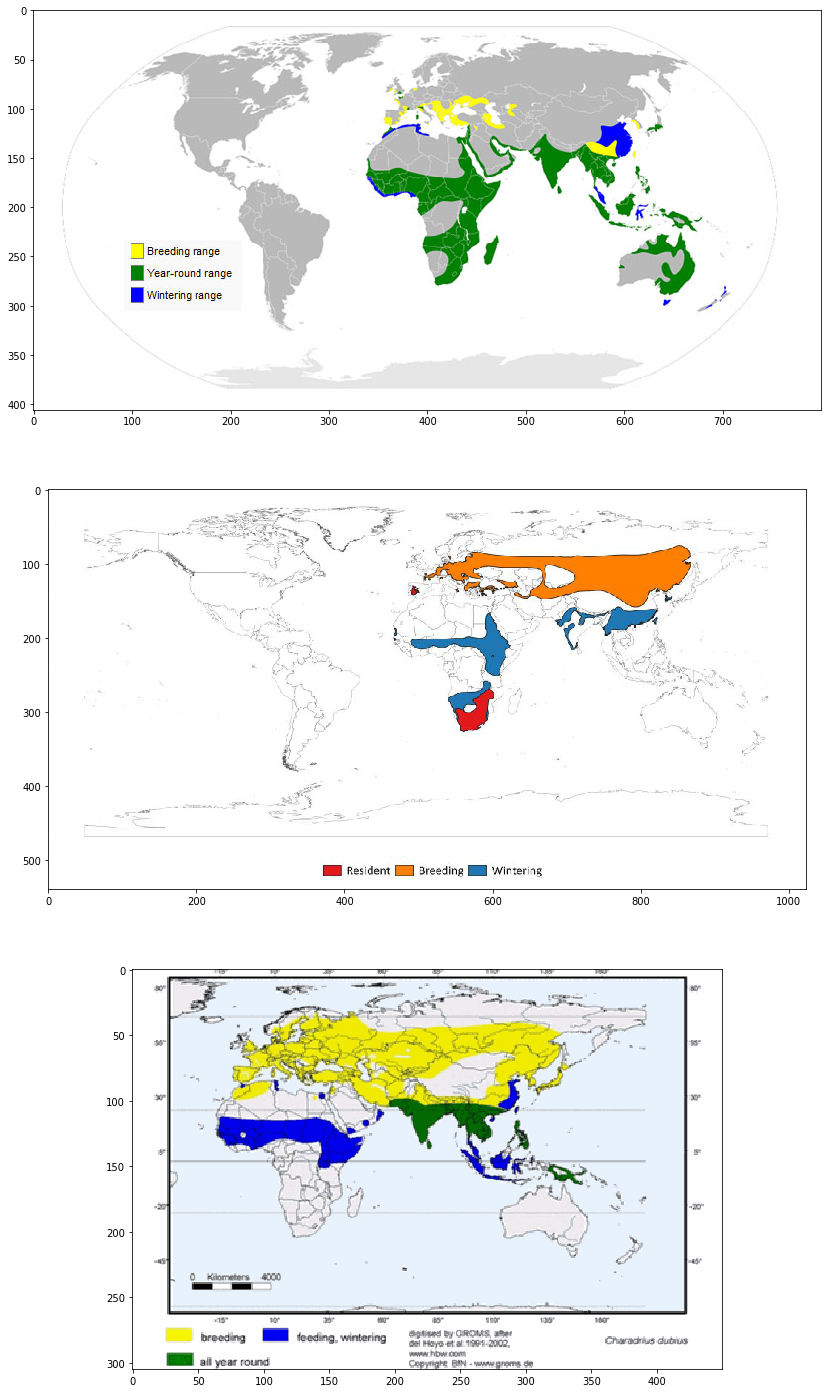

In [4]:
fig = plt.figure(figsize = (25, 25))

fig.add_subplot(3, 1, 1)
plt.imshow(egret)
fig.add_subplot(3, 1, 2)
plt.imshow(stork)
fig.add_subplot(3, 1, 3)
plt.imshow(plover)
plt.show()

### Analysing temperature data

The data about average temperatures since the year 2000 was derived from __[kaggle](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities)__.

In [5]:
city_temperatures = pd.read_csv('data-1/city_temperature.csv', low_memory=False)

In [6]:
city_temperatures.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


For the scope of this notebook I need information for the average temperatures in Bulgaria and Turkey for the years after 1999 and before 2020. 

In [7]:
bg_and_tr_temperature_millennium = city_temperatures[((city_temperatures.Country=='Turkey')|(city_temperatures.Country=='Bulgaria'))&((city_temperatures.Year>1999)&(city_temperatures.Year<2020))]

In [8]:
bg_and_tr_temperature_millennium.shape

(21918, 8)

In [9]:
bg_and_tr_temperature_millennium.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

The column 'State' is not necessary for either country and it can be removed.

In [10]:
bg_and_tr_temperature_millennium = bg_and_tr_temperature_millennium.drop(columns='State')

In [11]:
bg_and_tr_temperature_millennium.head(25)

,Region,Country,City,Month,Day,Year,AvgTemperature
662265,Europe,Bulgaria,Sofia,1,1,2000,25.9
662266,Europe,Bulgaria,Sofia,1,2,2000,20.6
662267,Europe,Bulgaria,Sofia,1,3,2000,19.6
662268,Europe,Bulgaria,Sofia,1,4,2000,23.1
662269,Europe,Bulgaria,Sofia,1,5,2000,24.4
662270,Europe,Bulgaria,Sofia,1,6,2000,31.6
662271,Europe,Bulgaria,Sofia,1,7,2000,25.7
662272,Europe,Bulgaria,Sofia,1,8,2000,16.3
662273,Europe,Bulgaria,Sofia,1,9,2000,15.2
662274,Europe,Bulgaria,Sofia,1,10,2000,11.8


Check for missing values in the remaining columns.

In [12]:
bg_and_tr_temperature_millennium.isnull().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

Check what are the unique values for country and year and what are the value types.

In [13]:
bg_and_tr_temperature_millennium.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [14]:
bg_and_tr_temperature_millennium.Country.unique()

array(['Bulgaria', 'Turkey'], dtype=object)

In [15]:
bg_and_tr_temperature_millennium.dtypes

Region             object
Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

Convert degrees from Fahrenheit to Celsius

In [16]:
bg_and_tr_temperature_millennium.AvgTemperature = bg_and_tr_temperature_millennium.AvgTemperature.apply(lambda x: (x-32)/1.8)

What is the temperature tendency for both countries by year?

In [17]:
temperature_by_year = bg_and_tr_temperature_millennium.groupby('Year')['AvgTemperature'].mean()

In [18]:
temperature_by_year

Year
2000    11.899767
2001    12.628666
2002    10.951446
2003    11.753577
2004    11.777322
2005    11.629072
2006    11.861948
2007    12.924201
2008    12.366373
2009    12.549569
2010    13.477270
2011    11.846728
2012    12.928709
2013    13.087367
2014    13.225774
2015    12.618549
2016    12.257994
2017    12.820345
2018    12.940893
2019    11.976662
Name: AvgTemperature, dtype: float64

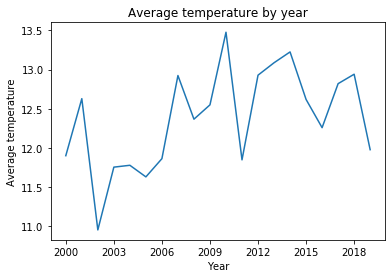

In [19]:
plt.plot(temperature_by_year)

plt.xticks(range(2000,2020,3))
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.title('Average temperature by year')

plt.show()

In [20]:
#negative skew - the tail is on the left and median > mean
#positive skew - the tail is on the right and median < mean
temperature_by_year.skew()

-0.27363933105946964

I will use temperature  information only for the months when it is expected that the birds we are interested in are migrating or not. Spring migration for the three species starts in March and autumn migration ends in October. This means that necessary for the research are the months November, December, January and February.

In [21]:
winter_temperatures = bg_and_tr_temperature_millennium[bg_and_tr_temperature_millennium.Month.isin([11, 12, 1, 2])]

In [22]:
winter_temperatures.Month.unique()

array([ 1,  2, 11, 12], dtype=int64)

For further analysis average monthly temperature for each year are needed.

In [23]:
winter_temperature_monthly = winter_temperatures.groupby(['Year', 'Month'])['AvgTemperature'].mean().reset_index()

In [24]:
winter_temperature_monthly

,Year,Month,AvgTemperature
0,2000,1,-2.448626
1,2000,2,1.531290
2,2000,11,9.399383
3,2000,12,3.676822
4,2001,1,3.222222
...,...,...,...
75,2018,12,3.190562
76,2019,1,-0.289725
77,2019,2,4.277116
78,2019,11,11.123457


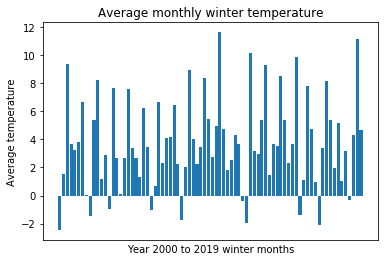

In [25]:
plt.bar(winter_temperature_monthly.index,winter_temperature_monthly.AvgTemperature)

plt.xticks([])
plt.xlabel('Year 2000 to 2019 winter months')
plt.ylabel('Average temperature')
plt.title('Average monthly winter temperature')
plt.show()

In [26]:
winter_temperature_monthly.AvgTemperature.skew()

0.3137071076099744

There doesn't seem to be an obvious tendency; however this can be checked with correlation coefficient.

In [27]:
def temperature_trend(index, temperature, order=1):
    '''Returns trend, if any, as a line slope coefficient in a set of tempearture data ordered by index'''
    coefficients = np.polyfit(index, list(temperature), order)
    slope = coefficients[-2]
    return slope

In [28]:
temperature_trend(winter_temperature_monthly.index, winter_temperature_monthly.AvgTemperature)

0.015487417327168596

It looks like there is a small positive trend regarding the winter months' temperatures. Now let's get information about the extremes.

In [29]:
extreme_winter_months = winter_temperature_monthly.sort_values('AvgTemperature')

In [30]:
warmest_winter_months = extreme_winter_months[-11:-1]
coldest_winter_months = extreme_winter_months[0:10]

In [31]:
warmest_winter_months

,Year,Month,AvgTemperature
70,2017,11,8.185802
10,2002,11,8.227160
38,2009,11,8.382099
58,2014,11,8.520370
34,2008,11,8.964198
54,2013,11,9.291975
2,2000,11,9.399383
62,2015,11,9.870988
50,2012,11,10.174074
78,2019,11,11.123457


In [32]:
coldest_winter_months

,Year,Month,AvgTemperature
0,2000,1,-2.448626
68,2017,1,-2.123656
49,2012,2,-1.973180
32,2008,1,-1.772999
8,2002,1,-1.460573
63,2015,12,-1.421875
24,2006,1,-1.061529
13,2003,2,-0.932540
48,2012,1,-0.422939
76,2019,1,-0.289725


As a small positive trend is observed in winter temperatures, as well as to warmest and coldest winter months we can check if this corresponds to any interesting tendency in the bird observations.

### Preparing bird data for analysis

All the small datasets with bird observations per month contain information for the particular month, total number of observations and total number of checklists submitted. There are 4 separate periods of 5 years:

2000-2004<br>
2005-2009<br>
2010-2014<br>
2014-2019<br>

For each of these periods there are observations for the three species for two countries - Turkey and Bulgaria. This makes a total number of 24 .csv files.

**Totals**: on eBird Bar Charts, the sum total of all counts from all observations for a species within a specified date range and region. 

**Checklist**: eBird checklists are aggregated lists of the birds identified while birding, plus effort data like duration and distance traveled during that birding event. 


In [33]:
#importing little egret in Bulgaria
egret_bulgaria_2000 = pd.read_csv('data/ebird_BG_litegr_2000_2004_1_12_linegraphs.txt', sep='\t')
egret_bulgaria_2005 = pd.read_csv('data/ebird_BG_litegr_2005_2009_1_12_linegraphs.txt', sep='\t')
egret_bulgaria_2010 = pd.read_csv('data/ebird_BG_litegr_2010_2014_1_12_linegraphs.txt', sep='\t')
egret_bulgaria_2015 = pd.read_csv('data/ebird_BG_litegr_2015_2019_1_12_linegraphs.txt', sep='\t')

#importing little egret in Turkey
egret_turkey_2000 = pd.read_csv('data/ebird_TR_litegr_2000_2004_1_12_linegraphs.txt', sep='\t')
egret_turkey_2005 = pd.read_csv('data/ebird_TR_litegr_2005_2009_1_12_linegraphs.txt', sep='\t')
egret_turkey_2010 = pd.read_csv('data/ebird_TR_litegr_2010_2014_1_12_linegraphs.txt', sep='\t')
egret_turkey_2015 = pd.read_csv('data/ebird_TR_litegr_2015_2019_1_12_linegraphs.txt', sep='\t')

#importing black stork in Bulgaria
stork_bulgaria_2000 = pd.read_csv('data/ebird_BG_blasto1_2000_2004_1_12_linegraphs.txt', sep='\t')
stork_bulgaria_2005 = pd.read_csv('data/ebird_BG_blasto1_2005_2009_1_12_linegraphs.txt', sep='\t')
stork_bulgaria_2010 = pd.read_csv('data/ebird_BG_blasto1_2010_2014_1_12_linegraphs.txt', sep='\t')
stork_bulgaria_2015 = pd.read_csv('data/ebird_BG_blasto1_2015_2019_1_12_linegraphs.txt', sep='\t')

#importing black stork in Turkey
stork_turkey_2000 = pd.read_csv('data/ebird_TR_blasto1_2000_2004_1_12_linegraphs.txt', sep='\t')
stork_turkey_2005 = pd.read_csv('data/ebird_TR_blasto1_2005_2009_1_12_linegraphs.txt', sep='\t')
stork_turkey_2010 = pd.read_csv('data/ebird_TR_blasto1_2010_2014_1_12_linegraphs.txt', sep='\t')
stork_turkey_2015 = pd.read_csv('data/ebird_TR_blasto1_2015_2019_1_12_linegraphs.txt', sep='\t')

#importing little ringed plover in Bulgaria
plover_bulgaria_2000 = pd.read_csv('data/ebird_BG_lirplo_2000_2004_1_12_linegraphs.txt', sep='\t')
plover_bulgaria_2005 = pd.read_csv('data/ebird_BG_lirplo_2005_2009_1_12_linegraphs.txt', sep='\t')
plover_bulgaria_2010 = pd.read_csv('data/ebird_BG_lirplo_2010_2014_1_12_linegraphs.txt', sep='\t')
plover_bulgaria_2015 = pd.read_csv('data/ebird_BG_lirplo_2015_2019_1_12_linegraphs.txt', sep='\t')

#importing little ringed plover in Turkey
plover_turkey_2000 = pd.read_csv('data/ebird_TR_lirplo_2000_2004_1_12_linegraphs.txt', sep='\t')
plover_turkey_2005 = pd.read_csv('data/ebird_TR_lirplo_2005_2009_1_12_linegraphs.txt', sep='\t')
plover_turkey_2010 = pd.read_csv('data/ebird_TR_lirplo_2010_2014_1_12_linegraphs.txt', sep='\t')
plover_turkey_2015 = pd.read_csv('data/ebird_TR_lirplo_2015_2019_1_12_linegraphs.txt', sep='\t')

In [34]:
def sum_observations_per_month (dataframe):
    '''Makes a sum of all observations and checklists for each month in the dataframe'''
    for i in range(1, 13):
        dataframe['month' + str(i)] = dataframe.apply(lambda row: row[(str(i)+'/1'):(str(i)+'/22')].sum(),axis=1)
    dataframe = dataframe.drop(dataframe.loc[:, '1/1':'12/22'].columns, axis = 1)
    return dataframe

In [35]:
def clean_table (dataframe):
    '''Returns a permutated dataframe with no NaN values, upadated column names
    and updated with montly sum of observations'''
    dataframe = dataframe.drop(columns='Unnamed: 0')
    dataframe = dataframe.dropna(axis=0)
    dataframe = sum_observations_per_month (dataframe)
    dataframe = dataframe.transpose().reset_index()
    
    #to remove the header
    dataframe = dataframe.rename(columns=dataframe.iloc[0]).drop(dataframe.index[0])
    
    #renaming columns
    dataframe.columns = dataframe.columns.str.extract('(\d+)')[0]
    dataframe = dataframe.rename(columns = {np.NaN:'Month'})
    
    #change names for the checklists and number of observations to list and obs + year respectively
    dataframe.columns = ['list_' + i if 0 < ix < 6 else i for ix, i in enumerate(dataframe.columns)]
    dataframe.columns = ['obs_' + i if ix > 5 else i for ix, i in enumerate(dataframe.columns)]
        
    return dataframe
    

In order to search for a relationship with the temperature data, all sets of bird observation data have to be concatenated per bird species per country, later the information for each bird species in Bulgaria has to be merged with the information for the corresponding species in Turkey.

In [36]:
#cleaning datasets for little egret in Bulgaria
egret_bulgaria_2000 = clean_table(egret_bulgaria_2000)
egret_bulgaria_2005 = clean_table(egret_bulgaria_2005)
egret_bulgaria_2010 = clean_table(egret_bulgaria_2010)
egret_bulgaria_2015 = clean_table(egret_bulgaria_2015)

#concatenating all 4 sets for little egret in Bulgaria
egret_bg = pd.concat([egret_bulgaria_2000, egret_bulgaria_2005, egret_bulgaria_2010, egret_bulgaria_2015], axis = 1)

#cleaning datasets for little ringed plover in Bulgaria
plover_bulgaria_2000 = clean_table(plover_bulgaria_2000)
plover_bulgaria_2005 = clean_table(plover_bulgaria_2005)
plover_bulgaria_2010 = clean_table(plover_bulgaria_2010)
plover_bulgaria_2015 = clean_table(plover_bulgaria_2015)

#concatenating all 4 sets for little ringed plover in Bulgaria

plover_bg = pd.concat([plover_bulgaria_2000, plover_bulgaria_2005, plover_bulgaria_2010, plover_bulgaria_2015], axis = 1)

#cleaning datasets for black stork in Bulgaria
stork_bulgaria_2000 = clean_table(stork_bulgaria_2000)
stork_bulgaria_2005 = clean_table(stork_bulgaria_2005)
stork_bulgaria_2010 = clean_table(stork_bulgaria_2010)
stork_bulgaria_2015 = clean_table(stork_bulgaria_2015)

#concatenating all 4 sets for black stork in Bulgaria

stork_bg = pd.concat([stork_bulgaria_2000, stork_bulgaria_2005, stork_bulgaria_2010, stork_bulgaria_2015], axis = 1)



#cleaning datasets for little egret in Turkey
egret_turkey_2000 = clean_table(egret_turkey_2000)
egret_turkey_2005 = clean_table(egret_turkey_2005)
egret_turkey_2010 = clean_table(egret_turkey_2010)
egret_turkey_2015 = clean_table(egret_turkey_2015)

#concatenating all 4 sets for little egret in Turkey
egret_tr = pd.concat([egret_turkey_2000, egret_turkey_2005, egret_turkey_2010, egret_turkey_2015], axis = 1)

#cleaning datasets for little ringed plover in Turkey
plover_turkey_2000 = clean_table(plover_turkey_2000)
plover_turkey_2005 = clean_table(plover_turkey_2005)
plover_turkey_2010 = clean_table(plover_turkey_2010)
plover_turkey_2015 = clean_table(plover_turkey_2015)

#concatenating all 4 sets for little ringed plover in Turkey

plover_tr = pd.concat([plover_turkey_2000, plover_turkey_2005, plover_turkey_2010, plover_turkey_2015], axis = 1)

#cleaning datasets for black stork in Turkey
stork_turkey_2000 = clean_table(stork_turkey_2000)
stork_turkey_2005 = clean_table(stork_turkey_2005)
stork_turkey_2010 = clean_table(stork_turkey_2010)
stork_turkey_2015 = clean_table(stork_turkey_2015)

#concatenating all 4 sets for black stork in Turkey

stork_tr = pd.concat([stork_turkey_2000, stork_turkey_2005, stork_turkey_2010, stork_turkey_2015], axis = 1)

Check for any 'nan' values.

In [37]:
plover_tr.isnull().sum()

Month        0
list_2000    0
list_2001    0
list_2002    0
list_2003    0
list_2004    0
obs_2000     0
obs_2001     0
obs_2002     0
obs_2003     0
obs_2004     0
Month        0
list_2005    0
list_2006    0
list_2007    0
list_2008    0
list_2009    0
obs_2005     0
obs_2006     0
obs_2007     0
obs_2008     0
obs_2009     0
Month        0
list_2010    0
list_2011    0
list_2012    0
list_2013    0
list_2014    0
obs_2010     0
obs_2011     0
obs_2012     0
obs_2013     0
obs_2014     0
Month        0
list_2015    0
list_2016    0
list_2017    0
list_2018    0
list_2019    0
obs_2015     0
obs_2016     0
obs_2017     0
obs_2018     0
obs_2019     0
dtype: int64

Now let's sum the observations and number of submitted checklists for Bulgaria and Turkey for each of the birds as we actually have average temperature for both countries.

In [38]:
egret = egret_bg.add(egret_tr, fill_value=0)
plover = plover_bg.add(plover_tr, fill_value=0)
stork = stork_bg.add(stork_tr, fill_value=0)

In [39]:
egret

,Month,list_2000,list_2001,list_2002,list_2003,list_2004,obs_2000,obs_2001,obs_2002,obs_2003,...,list_2015,list_2016,list_2017,list_2018,list_2019,obs_2015,obs_2016,obs_2017,obs_2018,obs_2019
1,month1month1,1,16,16,44,46,0,9,20,267,...,291,277,412,542,762,847,191,191,273,617
2,month2month2,1,9,30,33,68,3,0,67,89,...,158,284,407,433,556,133,94,123,260,188
3,month3month3,10,42,39,34,176,0,14,2,159,...,173,327,497,513,711,91,134,115,438,388
4,month4month4,20,468,248,64,249,7,31,53,187,...,246,675,734,732,1128,317,783,703,1128,1178
5,month5month5,21,1219,696,96,543,32,125,38,25,...,611,796,879,945,1325,365,813,689,1123,1359
6,month6month6,37,635,330,45,169,133,114,3,2,...,403,368,576,415,769,183,271,617,418,454
7,month7month7,40,157,12,51,176,145,846,0,128,...,232,228,304,413,540,412,347,460,510,1088
8,month8month8,12,19,32,47,114,40,45,130,107,...,215,187,297,369,692,174,1220,674,1506,2061
9,month9month9,13,28,45,62,199,93,52,319,156,...,274,292,358,651,815,595,572,604,1534,1199
10,month10month10,12,11,39,55,153,61,5,58,223,...,252,280,334,525,717,261,510,495,1063,789


Finally ended up with only 3 bird dataframes...Let's now select only the winter months.

In [40]:
def take_winter_months (dataframe):
    '''Returns a transposed dataframe with only winter moneths and renamed columns'''
    dataframe_winter = dataframe.iloc[[0, 1, 10, 11], :]
    dataframe_winter = dataframe_winter.transpose()
    dataframe_winter = dataframe_winter.rename(columns=dataframe_winter.iloc[0]).drop(dataframe_winter.index[0])
    dataframe_winter = dataframe_winter.rename(columns = {'month1month1':'Jan', 'month2month2':'Feb', 'month11month11':'Nov', "month12month12":'Dec'})
    return dataframe_winter

In [41]:
# Take only winter observations for all three species
winter_stork = take_winter_months(stork)
winter_egret = take_winter_months(egret)
winter_plover = take_winter_months(plover)

In [42]:
winter_egret

,Jan,Feb,Nov,Dec
list_2000,1,1,3,8
list_2001,16,9,5,13
list_2002,16,30,13,27
list_2003,44,33,50,40
list_2004,46,68,124,133
obs_2000,0,3,17,1
obs_2001,9,0,0,0
obs_2002,20,67,0,255
obs_2003,267,89,34,292
obs_2004,157,406,103,252


In [43]:
def separate_obs_check(dataframe):
    '''Takes in a dataframe and returns two dataframes - one with number of observations
    and one with number of checklists'''
    dataframe_observations = dataframe[dataframe.index.str.contains('obs')]
    dataframe_checklists = dataframe[dataframe.index.str.contains('list')]
    return dataframe_observations, dataframe_checklists

In [44]:
# Take the separate tables for 
stork_obs, stork_list = separate_obs_check(winter_stork)
egret_obs, egret_list = separate_obs_check(winter_egret)
plover_obs, plover_list = separate_obs_check(winter_plover)

In [45]:
# we need to unstack the table so we have each month of each consecutively following year
def unstack_observations(dataframe):
    '''Unstacks dataframe and renames columns'''
    dataframe = dataframe.transpose()
    dataframe = dataframe.unstack(level=-1).reset_index()
    dataframe['Year_and_Month'] = dataframe['level_1'] + ' ' + dataframe['level_0']
    dataframe = dataframe.drop(columns = ['level_0', 'level_1'])
    
    dataframe = dataframe[['Year_and_Month', 0]]
    dataframe = dataframe.rename(columns = {0:'Number_observations'})
    return dataframe


In [46]:
#unstack observation counts for each bird species
stork_data_observations = unstack_observations(stork_obs)
egret_data_observations = unstack_observations(egret_obs)
plover_data_observations = unstack_observations(plover_obs)

In [47]:
#unstack checklist counts for each bird species
stork_data_lists = unstack_observations(stork_list)
egret_data_lists = unstack_observations(egret_list)
plover_data_lists = unstack_observations(plover_list)

In [48]:
egret_data_observations 

,Year_and_Month,Number_observations
0,Jan obs_2000,0
1,Feb obs_2000,3
2,Nov obs_2000,17
3,Dec obs_2000,1
4,Jan obs_2001,9
...,...,...
75,Dec obs_2018,195
76,Jan obs_2019,617
77,Feb obs_2019,188
78,Nov obs_2019,396


### Analysis of bird data and correlating data

In [49]:
def visualise_observations_data(dataframe):
    '''makes a plot of the number of observations of given species during the winter months of the years 2000-2019'''
    plt.title("Number of observations dirung winter months per year")

    ax1 = plt.subplot(1,1,1)
    plt.plot(range(80), dataframe.Number_observations)
    ax1.set_xticks([0, 20, 40, 60, 80])
    ax1.set_xticklabels(['2000', '2005', '2010', '2015', '2020'])

    plt.xlabel('Year')
    plt.ylabel("Number Observations")
    plt.show()

C:\Users\schaubia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


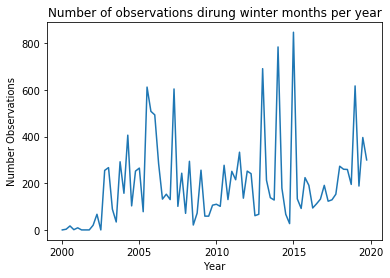

In [50]:
visualise_observations_data(egret_data_observations)

C:\Users\schaubia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


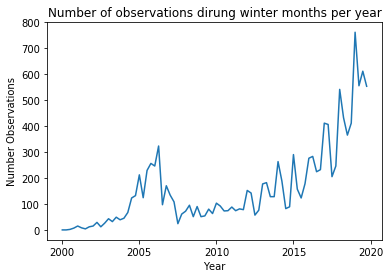

In [51]:
#We can plot the tendency of number of checklists submitted, 
#title and y-label here should read - 'Number checklists submitted duringthe winter months'
visualise_observations_data(egret_data_lists)

Number of submitted checklists have risen significantly after 2015 which means that larger total observations during this period may be insignificant.

Let's try to find any linear correlation between the data for little egret observations and the temperature averages during the same period.

In [52]:
egret_data_observations['Number_observations'].astype('float64').corr(winter_temperature_monthly.AvgTemperature).astype('float64')

-0.1533152641263007

In [53]:
stork_data_observations['Number_observations'].astype('float64').corr(winter_temperature_monthly.AvgTemperature).astype('float64')

-0.07546940607672986

In [54]:
plover_data_observations['Number_observations'].astype('float64').corr(winter_temperature_monthly.AvgTemperature).astype('float64')

0.029653455138022564

Let's first merge the relevant columns from the two dataframes and to find the correlation coefficient.

In [55]:
new_dataframe = pd.concat([egret_data_observations.Number_observations, winter_temperature_monthly.AvgTemperature], axis = 1)

In [56]:
new_dataframe

,Number_observations,AvgTemperature
0,0,-2.448626
1,3,1.531290
2,17,9.399383
3,1,3.676822
4,9,3.222222
...,...,...
75,195,3.190562
76,617,-0.289725
77,188,4.277116
78,396,11.123457


In [57]:
new_dataframe['Number_observations'] = new_dataframe['Number_observations'].astype(float)

In [66]:
new_dataframe.corr(method='spearman')

,Number_observations,AvgTemperature
Number_observations,1.000000,-0.226213
AvgTemperature,-0.226213,1.000000


The merging of the two dataframe columns leads to the same results. There is no obvious correlation between the average winter temperatures and the number of bird observations for the black stork and the ringed plover, there is a weak negative correlation between the temperature and little egret observations which is strange.

We can continue our data analysis taking the information regarding the little egret, as the most prominent species in the corresponding region, with observation period 2000-2015, as after that there is a huge rise in the number of submitted checklists.

### Analysis of little egret data and temperature data from 2000 to 2015

In [59]:
egret_observations_to2015 = egret_data_observations.iloc[:60]

In [60]:
egret_observations_to2015

,Year_and_Month,Number_observations
0,Jan obs_2000,0
1,Feb obs_2000,3
2,Nov obs_2000,17
3,Dec obs_2000,1
4,Jan obs_2001,9
5,Feb obs_2001,0
6,Nov obs_2001,0
7,Dec obs_2001,0
8,Jan obs_2002,20
9,Feb obs_2002,67


In [61]:
temperature_to2015 = winter_temperature_monthly.iloc[:60]

In [62]:
temperature_to2015

,Year,Month,AvgTemperature
0,2000,1,-2.448626
1,2000,2,1.531290
2,2000,11,9.399383
3,2000,12,3.676822
4,2001,1,3.222222
5,2001,2,3.833333
6,2001,11,6.632716
7,2001,12,0.045400
8,2002,1,-1.460573
9,2002,2,5.355820


In [63]:
egret_observations_to2015['Number_observations'].astype('float64').corr(temperature_to2015.AvgTemperature).astype('float64')

-0.13372683925096637

### Hypothesis testing

And again e negative correlation is observed.
We have to check whether there is a monotonic relationship between the two measurements (temperatures and bird observations). For this we are going to use Kendall's Rank Correlation test, which, according to Google, is more robust and efficient than Spearman correlation.

The following assumptions have to be made:
1. Observations in each sample are independent and identically distributed.
2. Observations in each sample can be ranked.

We have the following hypothesis:<br>

$ H_0 $ - The two samples are independent, there is no relationship between the two measurements (temperatures and observations), there is nothing interesting<br>
$ H_a $ - There is relationship between the two measurements (temperatures and observations).

In [64]:
data1 = egret_observations_to2015['Number_observations'].to_list()
data2 = temperature_to2015.AvgTemperature.to_list()
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.136, p=0.127
Probably independent


##### The null hypothesis, that there is no relationship between temperpatures and observations, cannot be rejected.

### Discussion and further investigations

According to the data acquired for the purpose of this notebook, there was no significant difference in the winter temperatures for the selected region during the last two decades. However there is a notable rise in the number of observations of little egret during the years and not so obviuos rise in the observations of the other two species. On the other hand this rise may indicate that more people are reporting observations and more checklists have been submitted. For that reason I have chosen time ranges when there is relatively simillar number of submitted checklists. The coefficient found is again weak negative. To see if there is a monotonic relationship between the average temperatures and the bird observations, I' ve performed a Kendall rank test which showed that the measurements are most probably independent.</br>

Further investigation has to be performed including:
1. Gain data for average land temperature information for broader territory across Eastern Europe.
2. Investigate how does number of observations of each species relate to the number of total submitted checklists and include this information to get a more realistic picture of the increase in observations.
3. Gather data for decrease in observations of birds that usually breed in Bulgaria and Turkey, but stay in the northern territories as temperatures rise.

### Conclusion

Following the preparation and interpretation of the available data for average temperatures in Sofia and Istanbul, it was found that for both cities, there is no significant trend in the measured land temperatures in the last two decades. The available data for three long-distance migrating birds (little egret, little ringed plover and black stork) showed that in the last two decades there is a steady rise in observations during winter months; however corresponding to a rise in submitted checklists by bird watchers. On the other hand the rise in winter observations of this birds is unusual and lays foundations for further investigations.

In [4]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [5]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
iris['0.2'].corr(iris['3.5'])

-0.3507331359754332

### Resources:
1. http://europepmc.org/article/MED/14519854
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2781852/
3. https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities
4. https://ebird.org/
5. https://stackoverflow.com/questions/55649356/how-can-i-detect-if-trend-is-increasing-or-decreasing-in-time-series
6. https://www.statisticssolutions.com/kendalls-tau-and-spearmans-rank-correlation-coefficient/